# Stock Prediction model training

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model, metrics, model_selection

In [162]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')
print(test_data.head())

          Date  Open Price  Close Price  High Price  Low Price      Volume
0  02-Jan-2018     2683.73      2695.81     2695.89    2682.36  1846463232
1  03-Jan-2018     2697.85      2713.06     2714.37    2697.77  2090595328
2  04-Jan-2018     2719.31      2723.99     2729.29    2719.07  2100767744
3  05-Jan-2018     2731.33      2743.15     2743.45    2727.92  1918869120
4  08-Jan-2018     2742.67      2747.71     2748.51    2737.60  1894823936


In [163]:
data_len = train_data.shape
data_len

(2264, 6)

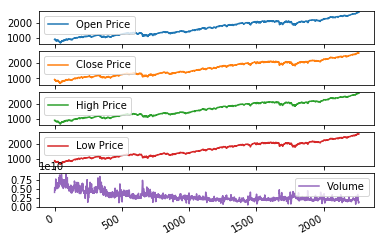

In [164]:
axes = train_data.plot.line(subplots=True)

In [165]:
# M = train_data["Close Price"].rolling(window=10).mean()
M=[]
date=[]
counter_month = 1
counter_year = 2009
counter_up_down = 0
price=0
for i in range(0, data_len[0]):
    price = train_data.iloc[i]["Close Price"] + price
    if i % 10 == 9:
        M.append(float(price)/10)
    if i % 10 == 0:
        if i!=0 and (i*0.1) % 2 == 0:
            counter_month = counter_month+1
            counter_up_down = 0
        else: counter_up_down = 1
        date.append(str(counter_year)+'/'+str(counter_month)+'-'+str(counter_up_down))
    if counter_month==12 and counter_up_down == 1: 
        counter_month = 0
        counter_year = counter_year+1
        
a = len(date)-1
if counter_up_down==0:
    date.remove(date[a])
# print(date)
# print(len(M))
df = { "Date": date, 
    "Mean": M}
df = pd.DataFrame(df)

df['Next Half Month'] = df['Mean'].shift(-1)

def f(x):
    if x[1] > x[0]:
        return 1
    return 0

df['Increase or not'] = df[['Mean', 'Next Half Month']].apply(f, axis=1)
df.head()

,Date,Mean,Next Half Month,Increase or not
0,2009/1-1,892.909,1731.151,1
1,2009/1-1,1731.151,2571.496,1
2,2009/2-0,2571.496,3331.165,1
3,2009/2-1,3331.165,4046.545,1
4,2009/3-0,4046.545,4846.975,1


In [198]:
df2 = pd.DataFrame(train_data)
df2['Next Day'] = df2['Close Price'].shift(-1)

def RiseOrNot(n):
    if n[1] > n[0]:
        return 1
    return 0

df2['Rise or not'] = df2[['Close Price', 'Next Day']].apply(RiseOrNot, axis=1)
df2.drop('Next Day', axis=1, inplace=True)
df2.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume,Rise or not
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080,0
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016,1
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032,0
3,07-Jan-2009,927.45,906.65,927.45,902.37,4704940032,1
4,08-Jan-2009,905.73,909.73,910.00,896.81,4991549952,0


In [200]:
df3 = pd.DataFrame(test_data)
df3['Next Day'] = df3['Close Price'].shift(-1)

df3['Rise or not'] = df3[['Close Price', 'Next Day']].apply(RiseOrNot, axis=1)
df3 = df3.dropna( axis=0, how='any' )
df3.drop('Next Day', axis=1, inplace=True)
df3.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume,Rise or not
0,02-Jan-2018,2683.73,2695.81,2695.89,2682.36,1846463232,1
1,03-Jan-2018,2697.85,2713.06,2714.37,2697.77,2090595328,1
2,04-Jan-2018,2719.31,2723.99,2729.29,2719.07,2100767744,1
3,05-Jan-2018,2731.33,2743.15,2743.45,2727.92,1918869120,1
4,08-Jan-2018,2742.67,2747.71,2748.51,2737.60,1894823936,1


## LogisticRegression

In [168]:
from sklearn.linear_model import LogisticRegression

In [202]:
train_X = pd.DataFrame([df2["Open Price"],
                        df2["Close Price"],
                        df2["High Price"],
                        df2["Low Price"],
                        df2["Volume"]
]).T
train_Y = df2["Rise or not"]

test_X = pd.DataFrame([df3["Open Price"],
                        df3["Close Price"],
                        df3["High Price"],
                        df3["Low Price"],
                        df3["Volume"]
]).T
test_Y = df3["Rise or not"]

In [203]:
lm = LogisticRegression()
lm.fit(train_X, train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [204]:
# lm.predict(test_X)
# lm.score(test_X, df3["Rise or not"])
def evaluate(model, x_train, y_train, x_test, y_test):
    train_preds = model.predict(x_train)
    test_preds = model.predict(x_test)
    train_acc = metrics.accuracy_score(y_train, train_preds)
    test_acc = metrics.accuracy_score(y_test, test_preds)
    print('Train accuracy: %s' % train_acc)
    print('Test accuracy: %s' % test_acc)
evaluate(lm, train_X, train_Y, test_X, test_Y)

Train accuracy: 0.5459363957597173
Test accuracy: 0.52


In [205]:
# 印出係數
print(lm.coef_)
# 印出截距
print(lm.intercept_ )

[[3.07237880e-17 3.04880664e-17 3.07597209e-17 3.04697454e-17
  5.55855610e-11]]
[1.95343929e-20]


## SVM

In [206]:
from sklearn.svm import SVC

In [207]:
clf = SVC(gamma='auto')
clf.fit(train_X, train_Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [208]:
clf.score(test_X, test_Y)

0.52

## NN

In [209]:
from sklearn.neural_network import MLPClassifier

In [212]:
mlp = MLPClassifier()
mlp.fit(train_X, train_Y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [213]:
mlp.score(test_X, test_Y)

0.48

## How did you preprocess this dataset ?

First, I do the data visualization to take a look at the training data, and I found that the data increased.<br>
Then I was thinking about how to make the stock feature more obvious.<br>
However, I did a stupid thing that I made average by every 10 days,<br>
so that we could know whether the stock rised or not during that month.<br>
The reason why it is stupid is that the results are all positive, which means every month the stock will rise.<br>
So, I changed the data prepocess to the simple one, which I only calculte the 'Close Price' between one day to one day.<br>

## Which classifier reaches the highest classification accuracy in this dataset ?
Why ?<br>
SVM and Logistic Regression had the same result, and they were better than NN at this case.<br>
But I thought it is because these two models need less parameters to estimate than a NN for a same set of input variables.<br> Then, a NN will require a larger dataset for its optimization in order to get its benefit of generalization and nonlinear mapping.<br>
Can this result remain if the dataset is different ?<br>
I think so. If we get more features to train the model, different models might have different results.<br>
Moreover, stock are things that have a strong relation with economy or human behaviors,<br>
so I think it will be better to put some features of those into the datasets.


In [214]:
df2.drop('Low Price', axis=1, inplace=True)
df2.drop('High Price', axis=1, inplace=True)
df3.drop('Low Price', axis=1, inplace=True)
df3.drop('High Price', axis=1, inplace=True)

In [215]:
clf2 = SVC(gamma='auto')
clf2.fit(train_X, train_Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [216]:
clf.score(test_X, test_Y)

0.52

## How did you improve your classifiers ?

For SVM, I try to take off some features to decrease the dimension and see whether the score will change.<br>
However, it seems not working.<br>
I think it's because the original dimension is not that 'high', so we can hardly get different models by doing this.